**Analyser le TOP 250 IMBD**

Analyser les données du top 250 du site web IMDB :   
_url_ : https://www.imdb.com/search/title/?groups=top_250&sort=user_rating

**Contexte du projet**

1. Récupérer les données des 250 films :
- Titre (exemple : Les Évadés).
- Année (exemple : 1994).
- Stars (exemple : 9,3).
- Nombre de votes (exemple : 2 382 128 ).
- Le réalisateur (exemple : Frank Darabont).
- Recette ( exemple : $28.34M).

2. Créer un data frame en intégrant la donnée récupérée.


3. Posez vous des questions et répondez-y en manipulant et visualisant la donnée via pandas, matplotlib ou searborn. Exemples : Il y a t-il une correlation entre le nombre de stars et le recette ? Quel est le nombre de film par année ? Quel est le réalisateur le mieux noté ? etc...


4. Architecturer son code en utilisant des methodes.



In [1]:
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd
from urllib.request import urlopen as uReq
import matplotlib.pyplot  as plt
import seaborn as sns

Set the initial parameters here:

In [2]:
#url = 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&ref_=adv_prv'
url = "https://www.imdb.com/search/title/?groups=top_250"
main_url = 'https://www.imdb.com'

## Get the data of Top Rated Movies from the IMDb site 

In [3]:
# function to get page soup from html page
def get_page_soup(url):
    # opening connection
    uClient = uReq(url)
    page_html = uClient.read()
    uClient.close()
    #html parser
    return soup(page_html, "html.parser")


# functon to get new url from the html page
def get_new_url_from_page(page_soup):
    url = page_soup.find("div", {
        "class": "desc"
    }).find("a", {"class": "lister-page-next next-page"})
    if url != None:
        url = url['href']
        url = main_url + url
    return url

In [4]:
# create list films with films from all pages
films = []
while url is not None:
    page = get_page_soup(url)
    url = get_new_url_from_page(page)

    films_on_page = page.findAll("div", {"class": "lister-item-content"})
    films = films + films_on_page

## Create a data frame with the movies 

In [5]:
headers = [
    'title', 'year', 'rate', 'votes', 'gross', 'directors', 'duration', 'genre'
]

IMDb_Top250 = pd.DataFrame(columns=headers)

for i, m in enumerate(films):
    row = []
    #title
    titre = films[i].h3.a.text
    row.append(titre)
    #year
    annee = films[i].h3.find("span", {
        "class": "lister-item-year text-muted unbold"
    }).text.strip('I ()')
    row.append(annee)
    ## rate
    rate = films[i].find("div", {
        "class": "inline-block ratings-imdb-rating"
    }).strong.text
    row.append(rate)
    ## votes & gross
    vote_and_recette = films[i].find("p", {
        "class": "sort-num_votes-visible"
    }).findAll('span')
    if len(vote_and_recette) < 4:
        row.append(vote_and_recette[1]['data-value'])
        row.append(None)
    else:
        row.append(vote_and_recette[1]['data-value'])
        row.append(vote_and_recette[4]['data-value'].replace(',', ''))
    ## director
    realisateur = films[i].find("p", {
        "class": ""
    }).text.strip().split(':\n')[1].replace(', ', '').split('\n')[:-2]
    row.append(realisateur)
    ## duration
    durée = films[i].find("span", {"class": "runtime"}).text.strip(' min')
    row.append(durée)
    ## genre
    genre = films[i].find("span", {
        "class": "genre"
    }).text.strip(" ").strip('\n').split(', ')
    row.append(genre)
    length = len(IMDb_Top250)
    IMDb_Top250.loc[length] = row

In [6]:
IMDb_Top250

,title,year,rate,votes,gross,directors,duration,genre
0,The Father,2020,8.3,50176,None,[Florian Zeller],97,[Drama]
1,Soul,2020,8.1,233567,None,"[Pete Docter, Kemp Powers]",100,"[Animation, Adventure, Comedy]"
2,Avengers: Endgame,2019,8.4,865948,858373000,"[Anthony Russo, Joe Russo]",181,"[Action, Adventure, Drama]"
3,Le parrain,1972,9.2,1653037,134966411,[Francis Ford Coppola],175,"[Crime, Drama]"
4,Parasite,2019,8.6,599910,53367844,[Bong Joon Ho],132,"[Comedy, Drama, Thriller]"
...,...,...,...,...,...,...,...,...
245,Le mécano de la Générale,1926,8.1,82591,1033895,"[Clyde Bruckman, Buster Keaton]",67,"[Action, Adventure, Comedy]"
246,La ruée vers l'or,1925,8.2,103018,5450000,[Charles Chaplin],95,"[Adventure, Comedy, Drama]"
247,La passion de Jeanne d'Arc,1928,8.1,49003,21877,[Carl Theodor Dreyer],110,"[Biography, Drama, History]"
248,Anand,1971,8.3,31441,None,[Hrishikesh Mukherjee],122,"[Drama, Musical]"


## Prepare data

In [7]:
IMDb_Top250[[len(i) > 2
             for i in IMDb_Top250["directors"]]].sort_values('rate',
                                                             ascending=False)

,title,year,rate,votes,gross,directors,duration,genre
50,Spider-Man: New Generation,2018,8.4,396550,190241310,"[Bob Persichetti, Peter Ramsey, Rodney Rothman]",117,"[Animation, Action, Adventure]"
126,Monstres & Cie,2001,8.1,828386,289916256,"[Pete Docter, David Silverman, Lee Unkrich]",92,"[Animation, Adventure, Comedy]"
127,Autant en emporte le vent,1939,8.1,294045,198676459,"[Victor Fleming, George Cukor, Sam Wood]",238,"[Drama, History, Romance]"


In [8]:
IMDb_Top250[IMDb_Top250['gross'].isna()].sort_values('year').head()

,title,year,rate,votes,gross,directors,duration,genre
221,Jeux dangereux,1942,8.2,31344,None,[Ernst Lubitsch],99,"[Comedy, Romance, War]"
168,La vie est belle,1946,8.6,411667,None,[Frank Capra],130,"[Drama, Family, Fantasy]"
184,Boulevard du Crépuscule,1950,8.4,204925,None,[Billy Wilder],110,"[Drama, Film-Noir]"
243,Le salaire de la peur,1953,8.1,55752,None,[Henri-Georges Clouzot],156,"[Adventure, Drama, Thriller]"
240,Voyage à Tokyo,1953,8.2,54789,None,[Yasujirô Ozu],136,[Drama]


In [9]:
IMDb_Top250.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      250 non-null    object
 1   year       250 non-null    object
 2   rate       250 non-null    object
 3   votes      250 non-null    object
 4   gross      216 non-null    object
 5   directors  250 non-null    object
 6   duration   250 non-null    object
 7   genre      250 non-null    object
dtypes: object(8)
memory usage: 17.6+ KB


In [10]:
features = IMDb_Top250.columns
numerical_features = ['year', 'rate', 'votes', 'gross', 'duration']
categorical_features = ['title', 'directors', 'genre']
#print(features)

In [11]:
IMDb_Top250.year.value_counts()

1995    8
2004    7
2019    7
2018    6
2000    6
       ..
1955    1
1925    1
1926    1
1964    1
1987    1
Name: year, Length: 84, dtype: int64

In [12]:
for f in numerical_features:
    IMDb_Top250[f] = IMDb_Top250[f].astype('float')
IMDb_Top250['year'] = IMDb_Top250['year'].astype('int')

In [32]:
IMDb_Top250.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   title      250 non-null    object  
 1   year       250 non-null    int64   
 2   rate       250 non-null    float64 
 3   votes      250 non-null    float64 
 4   gross      216 non-null    float64 
 5   directors  250 non-null    object  
 6   duration   250 non-null    float64 
 7   genre      250 non-null    object  
 8   decade     250 non-null    category
dtypes: category(1), float64(4), int64(1), object(3)
memory usage: 16.4+ KB


### Statistical values 

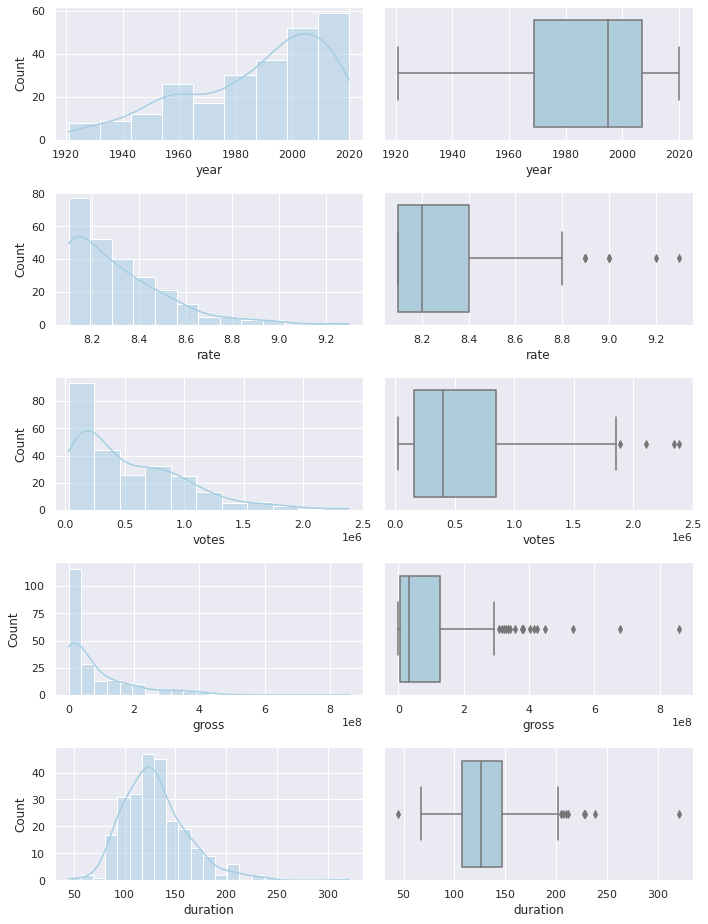

In [14]:
## make def
def plot_numeric_features(df, numerical_features_list):
    import seaborn as sns
    sns.set()  # Setting seaborn as default style even if use only matplotlib
    sns.set_palette("Paired")  # set color palette
    fig, axes = plt.subplots(nrows=len(numerical_features_list),
                             ncols=2,
                             figsize=(10, 13))
    for i, feature in enumerate(numerical_features_list):
        sns.histplot(data=df, x=feature, kde=True, ax=axes[i, 0])
        sns.boxplot(data=df, x=feature, ax=axes[i, 1])
    plt.tight_layout()
    plt.show()


plot_numeric_features(IMDb_Top250, numerical_features)

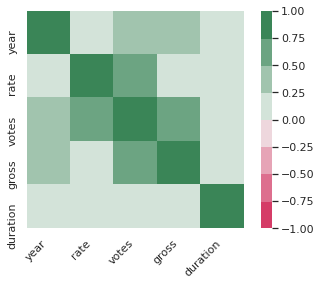

In [15]:
corr = IMDb_Top250[numerical_features].corr()
ax = sns.heatmap(corr,
                 vmin=-1,
                 vmax=1,
                 center=0,
                 cmap=sns.diverging_palette(1, 500, n=8),
                 square=True)
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')

## Answer the questions

Posez vous des questions et répondez-y en manipulant et visualisant la donnée via pandas, matplotlib ou searborn. 

Exemples : 
- Il y a t-il une correlation entre le nombre de stars et le recette ? 
- Quel est le nombre de film par année ? 
- Quel est le réalisateur le mieux noté ? etc...


<AxesSubplot:xlabel='rate', ylabel='gross'>

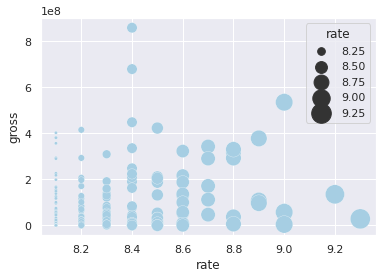

In [16]:
import seaborn as sns

sns.scatterplot(data=IMDb_Top250, x='rate', y='gross', size='rate', legend=True, sizes=(10, 400))

In [17]:
['titre, ''rate', 'nombre_de_votes', 'recette', 'année', 'realisateur']

['titre, rate', 'nombre_de_votes', 'recette', 'année', 'realisateur']

In [18]:
# Function to get statistics of all numerical features
def print_stat(df, numerical_features_list):
    for feature in numerical_features_list:
        print(
        """
        ** {} ** 
        ------------------------
        min:    {}  
        max:    {} 
        mean:   {:.1f} 
        median: {:.1f} 
        """.format(feature,
                   df[feature].min(), 
                   df[feature].max(), 
                   df[feature].mean(), 
                   df[feature].median()))
        
print_stat(IMDb_Top250, numerical_features)


        ** year ** 
        ------------------------
        min:    1921  
        max:    2020 
        mean:   1987.4 
        median: 1995.0 
        

        ** rate ** 
        ------------------------
        min:    8.1  
        max:    9.3 
        mean:   8.3 
        median: 8.2 
        

        ** votes ** 
        ------------------------
        min:    27991.0  
        max:    2385258.0 
        mean:   548725.7 
        median: 398834.0 
        

        ** gross ** 
        ------------------------
        min:    10177.0  
        max:    858373000.0 
        mean:   86848003.7 
        median: 31164078.0 
        

        ** duration ** 
        ------------------------
        min:    45.0  
        max:    321.0 
        mean:   130.3 
        median: 126.5 
        


In [19]:
def print_best_scores_movies(df, numeric_features):
    print("                              Movies with best scores".upper())
    print("""**************************************************************************************""")
    for feature in numeric_features:
        df.sort_values(by = feature, ascending=False, inplace=True, ignore_index= True)
        année = df.loc[0,'year']        
        titre = df.loc[0,'title']
        realisateur = df.loc[0,'directors']
        max_feature = df.loc[0,feature]
    
        print("""{:} ({:}) by {:} with  the highest {:} = {:,}\n""".format(titre, année, ', '.join(realisateur) , feature.replace('_', ' '), max_feature))
        
print_best_scores_movies(IMDb_Top250,['rate', 'votes', 'gross', 'duration'])

                              MOVIES WITH BEST SCORES
**************************************************************************************
Les Évadés (1994) by Frank Darabont with  the highest rate = 9.3

Les Évadés (1994) by Frank Darabont with  the highest votes = 2,385,258.0

Avengers: Endgame (2019) by Anthony Russo, Joe Russo with  the highest gross = 858,373,000.0

Gangs of Wasseypur (2012) by Anurag Kashyap with  the highest duration = 321.0



### Budget & rate correlation?

   rate  gross
0   8.1     66
1   8.2     41
2   8.3     36
3   8.4     26
4   8.5     18
5   8.6     11
6   8.7      5
7   8.8      5
8   8.9      3
9   9.0      3


<AxesSubplot:xlabel='rate', ylabel='gross'>

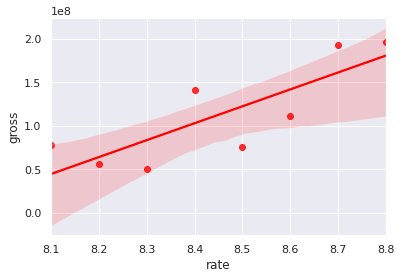

In [20]:
group_gross_rate = IMDb_Top250[['rate', 'gross']].groupby(by= 'rate', sort = True, as_index = False)
print(group_gross_rate.gross.count().head(10))

df = group_gross_rate.gross.mean()

sns.regplot(data = df[df.rate<8.9], x = 'rate', y = 'gross', color = 'red' )

<AxesSubplot:title={'center':'The number of movies by rate'}, xlabel='rate'>

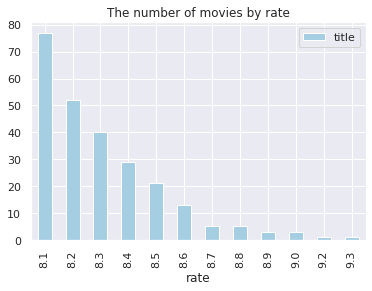

In [21]:
IMDb_Top250[['title', 'rate']].groupby('rate').count().plot(kind='bar', title='The number of movies by rate')

### Decades analysis

In [22]:
#number of bins by decade
bin_min = IMDb_Top250.year.min() // 10
bin_max = IMDb_Top250.year.max() // 10 + 1
bins = [10 * i - 1 for i in range(bin_min, bin_max + 1)]
group_names = [int(b + 1) for b in bins]

IMDb_Top250['decade'] = pd.cut(IMDb_Top250['year'],
                                bins,
                                labels=group_names[:-1],
                                include_lowest=True)

decade_rate = IMDb_Top250[['decade', 'rate',
                            'gross']].groupby(by='decade',
                                                sort=True,
                                                as_index=False).mean()
print(decade_rate.head(20))
print("""
Correlation average rate by decade with time   = {}
Correlation average budget by decade with time = {}
""".format(decade_rate.rate.corr(decade_rate.decade),
           decade_rate.gross.corr(decade_rate.decade)))

   decade      rate         gross
0    1920  8.200000  2.361552e+06
1    1930  8.266667  3.547463e+07
2    1940  8.300000  2.346849e+06
3    1950  8.278261  1.433139e+07
4    1960  8.305556  1.729602e+07
5    1970  8.347368  7.864391e+07
6    1980  8.267857  8.021483e+07
7    1990  8.407692  1.018534e+08
8    2000  8.300000  1.024131e+08
9    2010  8.254000  1.424995e+08
10   2020  8.300000           NaN

Correlation average rate by decade with time   = 0.38119497671151226
Correlation average budget by decade with time = 0.9182114650071519



<AxesSubplot:xlabel='decade', ylabel='gross'>

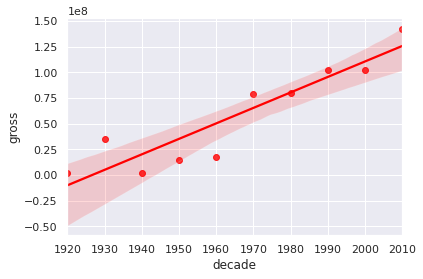

In [23]:
sns.regplot(data = decade_rate, x = 'decade', y = 'gross', color = 'red')

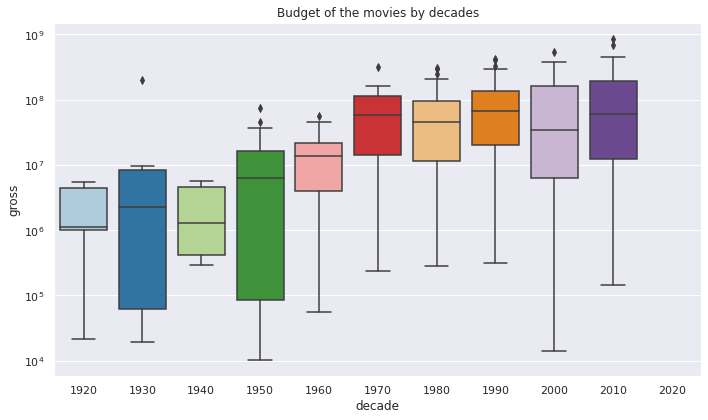

In [24]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(data = IMDb_Top250, x="decade", y="gross")
ax.set_yscale("log")
ax.set_title(f"Budget of the movies by decades")
plt.tight_layout()

### Directors analysis



In [25]:
## Function to create new data frame

def create_transformed_df(old_df, elem_list, features_list):
    """elem_list should be in type list"""
    from statistics import mean
    new_dict = {}
    for index, elems in zip(old_df.index, old_df[elem_list]):
        for elem in elems:
            if elem in new_dict.keys():
                for j, feature in enumerate(features_list):
                    new_dict[elem][j].append(float(old_df.loc[index, feature]))
            else:
                new_dict[elem] = [[] for i in range(len(features_list))]
                for j, feature in enumerate(features_list):
                    new_dict[elem][j].append(float(old_df.loc[index, feature]))

    headers = [elem_list]
    for i in features_list:
        headers.append(f'avg_movie_{i}')
    headers.append('number_of_movies')  ##? how to name?

    new_df = pd.DataFrame(columns=headers)

    for key in new_dict:
        row = []
        row.append(key)
        for i, col in enumerate(headers[1:-1]):
            mean_val = mean(new_dict[key][i])
            row.append(mean_val)
        num = len(new_dict[key][0])
        row.append(num)

        length = len(new_df)
        new_df.loc[length] = row

    return new_df


directors = create_transformed_df(IMDb_Top250, 'directors',
                                  ['rate', 'gross', 'duration'])
directors.head()

,directors,avg_movie_rate,avg_movie_gross,avg_movie_duration,number_of_movies
0,Anurag Kashyap,8.200,NaN,321.00,1
1,Victor Fleming,8.100,198676459.0,238.00,1
2,George Cukor,8.100,198676459.0,238.00,1
3,Sam Wood,8.100,198676459.0,238.00,1
4,Sergio Leone,8.475,7935754.0,171.75,4


In [26]:
## Plot top 20 with the highest rate/recette/movie_duration
def barplot_top_N(df, label, n_top):
    """
    Function to make barblot of the top N realisateur with the highest value of feature
    df = data frame
    features = list of names of columns 
    n_top = number of names in final barblot    
    """
    features = list(df.columns)
    features = features[1:]
    num_rows = len(features) // 2
    if len(features) % 2 == 1: num_rows += 1
    f, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(18, 10))
    for i, feature in enumerate(features):
        df_sorted = df.sort_values(by=feature,
                                   ascending=False,
                                   inplace=False,
                                   ignore_index=True)
        sns.barplot(data=df_sorted.head(n_top),
                    y=label,
                    x=feature,
                    ax=axes[i // 2, i % 2])
        min_rate = df_sorted[feature].min()
        max_rate = df_sorted[feature].max()
        # Add a legend and informative axis label
        axes[i // 2, i % 2].set(xlim=(min_rate, max_rate * 1.01),
                                xlabel=feature)  #, ylabel="",)
        sns.despine(left=True, bottom=True, ax=axes[i // 2, i % 2])
        axes[i // 2, i % 2].set_title(
            f"Top {n_top} {label} with the highest {feature} ", size=12)
    plt.subplots_adjust()
    plt.tight_layout()

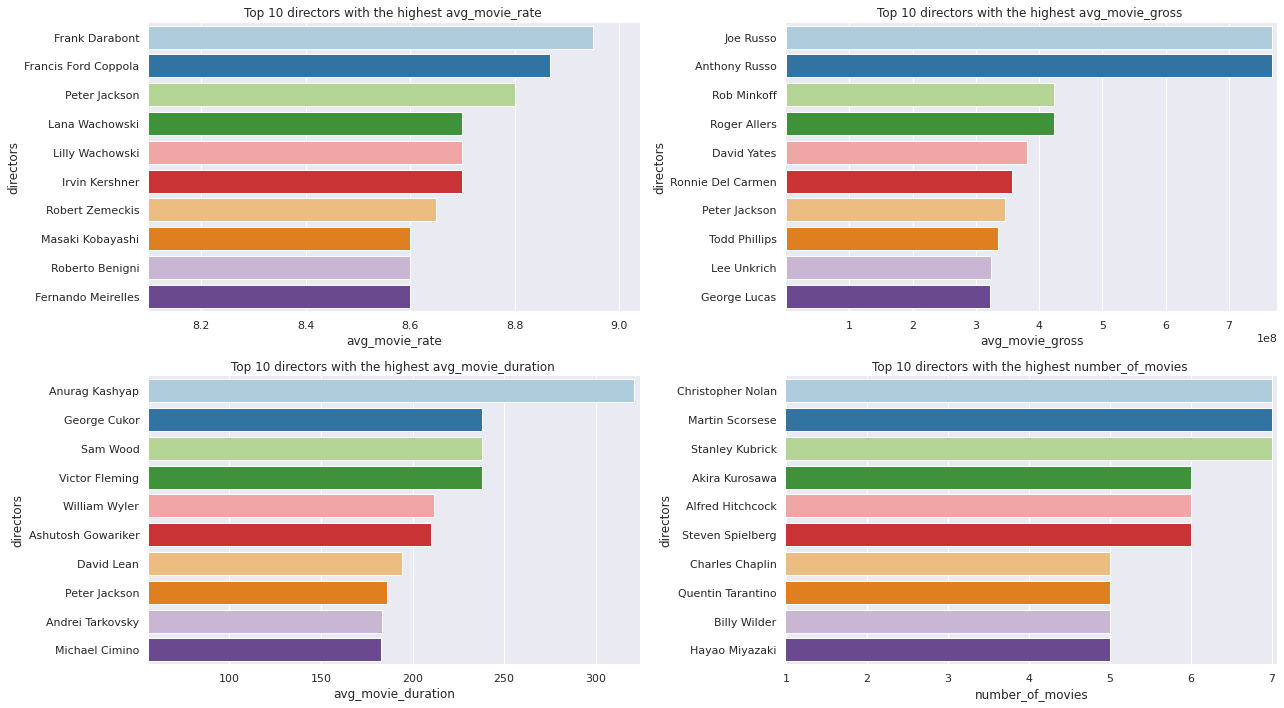

In [27]:
barplot_top_N(directors, 'directors', 10)

### Genre analysis

In [28]:
genre = create_transformed_df(IMDb_Top250, 'genre',
                              ['rate', 'gross', 'duration'])
genre.head(100)

,genre,avg_movie_rate,avg_movie_gross,avg_movie_duration,number_of_movies
0,Action,8.374419,NaN,140.186047,43
1,Comedy,8.238636,NaN,112.340909,44
2,Crime,8.324561,NaN,136.245614,57
3,Drama,8.304891,NaN,134.298913,184
4,History,8.226667,NaN,164.066667,15
5,Romance,8.270833,NaN,117.416667,24
6,Adventure,8.310909,NaN,132.709091,55
7,Biography,8.248148,NaN,147.111111,27
8,Fantasy,8.350000,NaN,119.916667,12
9,War,8.285000,NaN,130.550000,20


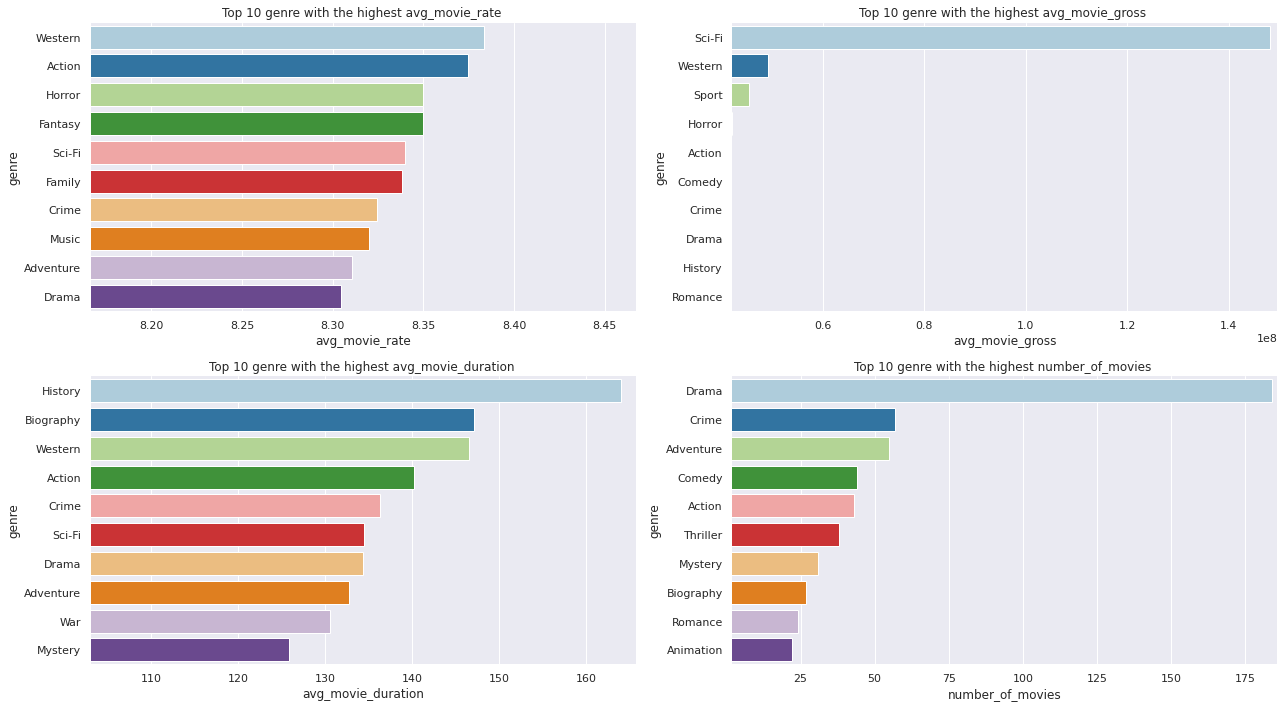

In [29]:
barplot_top_N(genre, 'genre', 10)

## Rate prediction with log regression


In [30]:
# Get dummies for directors and genre
from sklearn.preprocessing import MultiLabelBinarizer 

mlb = MultiLabelBinarizer()

genre_dummies = pd.DataFrame(mlb.fit_transform(IMDb_Top250.genre),columns=mlb.classes_, index=IMDb_Top250.index)
#genre_dummies.head()

In [31]:
directors_dummies = pd.DataFrame(mlb.fit_transform(IMDb_Top250.directors),columns=mlb.classes_, index=IMDb_Top250.index)
#directors_dummies.head()

,Aamir Khan,Adam Elliot,Adrian Molina,Akira Kurosawa,Alejandro G. Iñárritu,Alfred Hitchcock,Amole Gupte,Andrei Tarkovsky,Andrew Stanton,Anthony Russo,...,Vittorio De Sica,Wes Anderson,William Wyler,Wim Wenders,Wolfgang Petersen,Yasujirô Ozu,Yavuz Turgul,Zaza Urushadze,Çagan Irmak,Éric Toledano
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [33]:
#

In [ ]:
##Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures),
         ('model', LinearRegression)]
pipe = Pipeline(Input)
pipe.fit(x,y)
pipe.predict(x_test)